# Projet Python Data Analysis

# Dataset : Poker Hand

## Packages import

In [63]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


## Data Exploration


In [207]:
column = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","Y"]
df_poker_hand_train = pd.read_csv('poker-hand-training-true.data.txt',names=column)
df_poker_hand_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Y
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [208]:
# Décris les variables quantitative
df_poker_hand_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Y
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [209]:
column = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","Y"]
df_poker_hand_test = pd.read_csv('poker-hand-testing.data.txt',names=column)
df_poker_hand_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Y
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [210]:
# Décris les variables quantitative
df_poker_hand_test.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Y
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


### Distribution des données

Point important car le dataset est jugé comme difficile.

In [6]:
print("Distribution de la target sur Train\n",df_poker_hand_train.Y.value_counts(normalize=True)*100),print()
print("Distribution de la target sur Test\n",df_poker_hand_test.Y.value_counts(normalize=True)*100)

Distribution de la target sur Train
 0    49.952019
1    42.379048
2     4.822071
3     2.051180
4     0.371851
5     0.215914
6     0.143942
7     0.023990
9     0.019992
8     0.019992
Name: Y, dtype: float64

Distribution de la target sur Test
 0    50.1209
1    42.2498
2     4.7622
3     2.1121
4     0.3885
5     0.1996
6     0.1424
7     0.0230
8     0.0012
9     0.0003
Name: Y, dtype: float64


Text(0, 0.5, "Nombres d'observations")

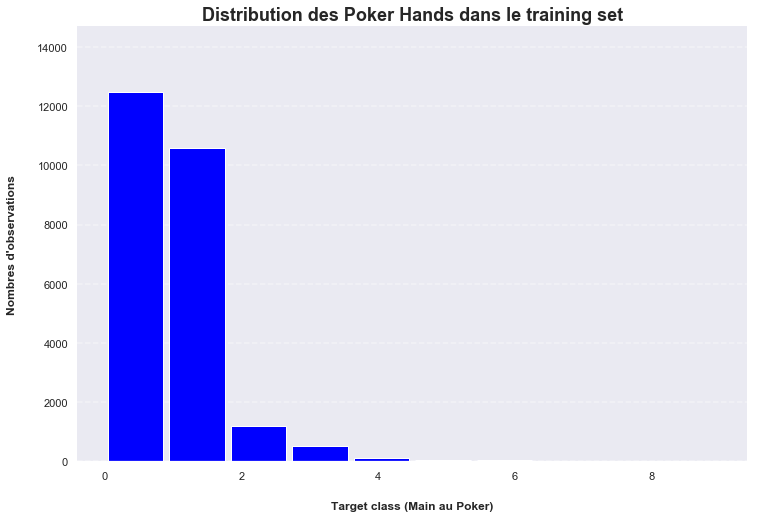

In [102]:
ax = df_train_y.hist(grid=False, figsize=(12,8), color='Blue', zorder=2, rwidth=0.9)


# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#ffffff', zorder=1)

# Remove title
ax.set_title("Distribution des Poker Hands dans le training set",weight='bold', size=18)

# Set x-axis label
ax.set_xlabel("Target class (Main au Poker)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Nombres d'observations", labelpad=20, weight='bold', size=12)

Text(0, 0.5, "Nombres d'observations")

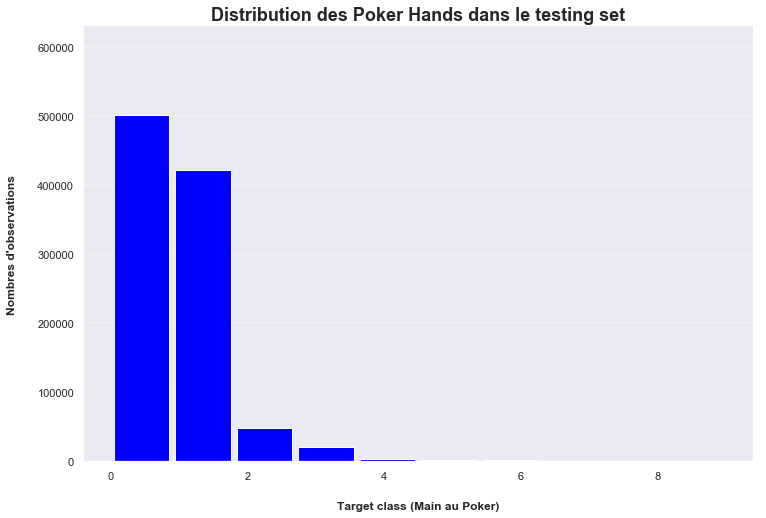

In [100]:
ax = df_test_y.hist(grid=False, figsize=(12,8), color='Blue', zorder=2, rwidth=0.9)


# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#ffffff', zorder=1)

# Remove title
ax.set_title("Distribution des Poker Hands dans le testing set",weight='bold', size=18)

# Set x-axis label
ax.set_xlabel("Target class (Main au Poker)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Nombres d'observations", labelpad=20, weight='bold', size=12)

__On remarque que la distribution des targets sur le jeu de train sont sensiblement similaire aux probabilités d'apparitions des mains dans le poker avec un jeu de 52 cartes.__

__Les classes 4, 5, 6, 7, 8, 9 représentent  moins de 1% (0.7953%) des données du dataset de train.__

__Je présume donc, qu'étant donnée la faible quantité d'observations dans le jeu de train (25 010 lignes) par rapport au jeu de test (1 000 000 lignes) et avec ce type de distribution le modèle risque de très mal se comporter sur les mains les plus rares.__

![title](img/poker_proba.png)

## Data Preparation

In [7]:
# On sépare la target de notre jeu de données d'entrainement 
df_train_X = df_poker_hand_train[df_poker_hand_train.columns[:-1]]
df_train_y = df_poker_hand_train[df_poker_hand_train.columns[-1]]
print(df_train_X.shape)
print(df_train_y.shape)

# On sépare la target de notre jeu de données de test
df_test_X = df_poker_hand_test[df_poker_hand_test.columns[:-1]]
df_test_y = df_poker_hand_test[df_poker_hand_test.columns[-1]]

print(df_test_X.shape)
print(df_test_y.shape)

(25010, 10)
(25010,)
(1000000, 10)
(1000000,)


In [8]:
# On dummify les modalitées de nos variables car on veut représenter chaque attributs de chaque carte comme une catégorie
encoder_df = OneHotEncoder(sparse=False)
df_train_X_dum = encoder_df.fit_transform(df_train_X)
df_test_X_dum = encoder_df.transform(df_test_X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
# On repasse en dataframe pour plus de simplicité et de clarté 
df_train_X_dum = pd.DataFrame(df_train_X_dum)
print(df_train_X_dum.shape)
df_test_X_dum = pd.DataFrame(df_test_X_dum)
print(df_test_X_dum.shape)

(25010, 85)
(1000000, 85)


__Création de prédictions naives, dans le cas ou l'on prédit tout à 0, afin de pouvoir juger la pertinence des autres modèles__

In [295]:
df_poker_hand_test["prediction_naive"] = 0 # Classe la plus représenté dans le jeu de train
score_naive_model = accuracy_score(df_poker_hand_test['Y'],df_poker_hand_test['prediction_naive'])*100

In [296]:
print('Accuracy modèle naif : {:.2f}%'.format(score_naive_model))

Accuracy modèle naif : 50.12%


In [ ]:
#del df_poker_hand_test,df_poker_hand_train

## Modélisation

### Baseline modèle - Random Forest

On atteint 70,38% d'accuracy sur notre modèle de baseline. Ce qui est plutot correcte par rapport au modèle naif.

On remarque, cependant, que le modèle n'est pas capable de prédire les classes au delà de la 3ème sauf pour la 5ème. Ce qui rejoins notre hypothèse de départ.



In [297]:
clf_baseline = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1,verbose=1)
clf_baseline.fit(df_train_X_dum,df_train_y)
pred_baseline = clf_baseline.predict(df_test_X_dum)
score_baseline = accuracy_score(df_test_y,pred_baseline)*100
print('Accuracy baseline modèle  : {:.4f}%'.format(score_baseline))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.2s finished


Accuracy baseline modèle  : 70.3798%


In [105]:
print(classification_report(df_test_y,pred_baseline))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.71      0.93      0.80    501209
           1       0.70      0.56      0.62    422498
           2       0.73      0.00      0.00     47622
           3       0.93      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       1.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

   micro avg       0.70      0.70      0.70   1000000
   macro avg       0.41      0.15      0.14   1000000
weighted avg       0.71      0.70      0.67   1000000



### Random Search avec Cross Validation pour le paramétrage des hyperparamètres - Random Forest

Utilisation d'un random search pour alléger le temps de calculs et orienter les paramètres d'un futur grid search.
Dans l'idée d'une Bayesian Optimization mais pas le temps de l'implémenter.

In [62]:
# Nombre d'arbres 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Nombre de features à considérer pour chaque split
max_features = ['auto', 'sqrt']
# Profondeur max
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Nombre minimum d'échantillons pour split sur un noeud
min_samples_split = [2, 5, 10]
# Le nombre minimum d'échantillons requis pour être sur un nœud finis
min_samples_leaf = [1, 2, 4]
# Méthode de selection des échantillons pour chaque arbres
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
# On optimise en fonction de l'accuracy
rdm_clf_tune = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), 
                                  param_distributions=random_grid,
                                  n_iter = 100, scoring='accuracy', 
                                  cv = 3, verbose=2, random_state=0, n_jobs=-1,
                                  return_train_score=True)


In [64]:
rdm_clf_tune.fit(df_train_X_dum,df_train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 38.8min
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 98.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 134.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='accuracy', verbose=2)

In [65]:
rdm_clf_tune.best_params_

{'n_estimators': 1577,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

### Best Random Search - Random Forest

In [66]:
rdm_clf_best_random = rdm_clf_tune.best_estimator_
pred_best_random = rdm_clf_best_random.predict(df_test_X_dum)
score_best_random = accuracy_score(df_test_y,pred_best_random)*100
print('Accuracy random forest avec hyperparam tuning  : {:.4f}%'.format(score_best_random))

Accuracy random forest avec hyperparam tuning  : 0.7639%


In [278]:
print('Amélioration du score de {:0.4f}%.'.format( 100 *(score_best_random - score_baseline) / score_baseline))

NameError: name 'score_best_random' is not defined

__On remarque qu'on a améliorer notre accuracy par rapport à notre baseline modèle de 8.54%.__ 

__Cependant, on remarque aussi que le modèle est devenue plus précis sur les classes sur représenté tandis que pour les classes sous représentées il n'est plus capable de les prédire (logique car on a maximiser l'accuracy)__

In [68]:
print(metrics.classification_report(df_test_y,pred_best_random))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.76      0.98      0.86    501209
           1       0.77      0.65      0.70    422498
           2       1.00      0.00      0.00     47622
           3       0.67      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

   micro avg       0.76      0.76      0.76   1000000
   macro avg       0.32      0.16      0.16   1000000
weighted avg       0.77      0.76      0.73   1000000



### Grid Search avec Cross Validation - Random Forest

On essai d'être plus précis avec un Grid Search maintenant qu'on a une première idée du scope des hyperparamètres à optimiser

In [72]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [50, 60, 70],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 500, 700]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [73]:
# Fit the grid search to the data
grid_search.fit(df_train_X_dum, df_train_y);

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 27.4min finished


In [74]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}

### Best Grid Search - Random Forest

In [67]:
rdm_clf_best_grid = grid_search.best_estimator_
pred_best_grid = rdm_clf_best_grid.predict(df_test_X_dum)
score_best_grid = accuracy_score(df_test_y,pred_best_grid)*100
print('Accuracy random forest avec hyperparam tuning  : {:.4f}%'.format(score_best_grid))

Accuracy random forest avec hyperparam tuning  : 0.7645%


In [86]:
print(metrics.classification_report(df_test_y,pred_best_grid))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.76      0.98      0.86    501209
           1       0.77      0.65      0.71    422498
           2       1.00      0.00      0.00     47622
           3       0.50      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

   micro avg       0.76      0.76      0.76   1000000
   macro avg       0.30      0.16      0.16   1000000
weighted avg       0.77      0.76      0.73   1000000



__Pas très rentable en terme de temps pour une amélioration de seulement 0.0744%__

In [91]:
print('Amélioration du score de {:0.4f}%.'.format( 100 *(score_best_grid - score_best_random) / score_best_random))

Amélioration du score de 0.0744%.


### Trade-Off pour le nombres d'arbres - Random Forest

In [140]:
# Rédution du nombre d'arbre à 300 car bon trade-off entre accuracy et temps de calcul
clf_best_tradeoff = RandomForestClassifier(bootstrap= False,
                             max_depth= 60,
                             max_features= 'auto',
                             min_samples_leaf= 1,
                             min_samples_split= 10,
                             n_estimators= 300,
                             random_state=0, n_jobs=-1,verbose=1)

clf_best_tradeoff.fit(df_train_X_dum,df_train_y)
pred_best_tradeoff = clf_best_tradeoff.predict(df_test_X_dum)
score_best_tradeoff = accuracy_score(df_test_y,pred_best_tradeoff)*100

print('Accuracy baseline modèle  : {:.4f}%'.format(score_best_tradeoff))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   35.9s finished


Accuracy baseline modèle  : 0.7608%


In [90]:
# Sauvgarde des modèles
pickle.dump(rdm_clf_best_grid, open('rdm_clf_best_grid.pkl','wb'))
pickle.dump(clf_best_tradeoff, open('clf_best_tradeoff.pkl','wb'))

In [65]:
#rdm_clf_best_grid = pickle.load(open('rdm_clf_best_grid.pkl','rb'))

### Autre approche de modélisation - Multi-Layer Perceptron Classifier

Après pas mal d'optimisations on voit que l'on a atteint les limites du Random Forest sur ce type de données.

Etant donnée la difficulté de ce dataset je me suis renseigné sur internet afin d'améliorer les résultats et j'ai trouvé que le Multi-Layer Perceptron Classifier performait très bien sur ce type de données non linéaire et avec une très mauvaise distribution.

In [273]:
# On Scale les données pour faciliter la convergence du MLP
scaler = StandardScaler()

data_train_X = scaler.fit_transform(df_train_X)
data_test_X = scaler.transform(df_test_X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


__Les hyperparamètres on été définit d'après ce rapport : https://github.com/sahirnoorali/poker-hand-analysis/blob/master/Report.pdf__

__Ce sont les paramètres optimaux qu'a trouvé cette personne pour le "state of the art" sur ce dataset__ 

__J'ai aussi testé avec les données dummify (avec scaler et sans scaler) mais l'accuracy était légérement en dessous (96%) je suis donc resté sur les données sans dummification et avec un scaler__

In [274]:
clf_MLP = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(64,64),
                        activation='tanh', learning_rate_init=0.02,max_iter=2000,
                        random_state=0, verbose=2)

clf_MLP.fit(data_train_X, df_train_y)
pred_MLP = clf_MLP.predict(data_test_X)

Iteration 1, loss = 1.01567976
Iteration 2, loss = 0.97364193
Iteration 3, loss = 0.95627863
Iteration 4, loss = 0.95687946
Iteration 5, loss = 0.91490610
Iteration 6, loss = 0.90140684
Iteration 7, loss = 0.82813141
Iteration 8, loss = 0.74719821
Iteration 9, loss = 0.71012673
Iteration 10, loss = 0.57541805
Iteration 11, loss = 0.45401125
Iteration 12, loss = 0.32147827
Iteration 13, loss = 0.22666582
Iteration 14, loss = 0.18709449
Iteration 15, loss = 0.15961656
Iteration 16, loss = 0.14161509
Iteration 17, loss = 0.14263935
Iteration 18, loss = 0.23072203
Iteration 19, loss = 0.11339675
Iteration 20, loss = 0.09657091
Iteration 21, loss = 0.09470253
Iteration 22, loss = 0.08654500
Iteration 23, loss = 0.08105579
Iteration 24, loss = 0.07372785
Iteration 25, loss = 0.06891031
Iteration 26, loss = 0.09077814
Iteration 27, loss = 0.17209859
Iteration 28, loss = 0.09873666
Iteration 29, loss = 0.06117188
Iteration 30, loss = 0.05666061
Iteration 31, loss = 0.05557796
Iteration 32, los

__On remarque que le MLP est excellent concernant les classes les plus représentées (0 à 3, qui contiennent 99,245% des observations) et performe plutot bien sur les classes 4, 5, 6 et 7. Cependant, le modèle n'est toujours pas capable d'identifier les classes les plus sous présenté (8 et 9).__

__Une méthode afin d'être plus performant sur ces classes sous représentées serait de faire de l'over-sampling ou d'entrainer un modèle afin de reconnaitre si une main fait parti des classes sous représenté, puis classifier cette main avec uniquement les classes sous représentées.__

In [298]:
score_MLP = accuracy_score(df_test_y, pred_MLP)*100

print(classification_report(df_test_y,pred_MLP))
print('Accuracy MLPClassifier  : {:.4f}%'.format(score_MLP))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    501209
           1       0.99      0.99      0.99    422498
           2       0.89      0.97      0.93     47622
           3       0.93      0.76      0.84     21121
           4       0.62      0.12      0.20      3885
           5       0.25      0.04      0.07      1996
           6       0.72      0.40      0.51      1424
           7       0.33      0.17      0.22       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

   micro avg       0.98      0.98      0.98   1000000
   macro avg       0.57      0.44      0.47   1000000
weighted avg       0.98      0.98      0.98   1000000

Accuracy MLPClassifier  : 98.2056%


__On constate une grosse amélioration de l'accuracy +28.45% par rapport au Random forest avec Grid Search.__

In [300]:
print('Amélioration du score de {:0.4f}%.'.format( 100 * (score_MLP - score_best_grid) / score_best_grid))

Amélioration du score de 12745.7124%.


In [70]:
# Sauvgarde du modèles
pickle.dump(clf_MLP, open('clf_MLP.pkl','wb'))

### Comparaison des modèles testés avec leurs scores

In [301]:
names = ['Naive_model','Baseline_rdm_forest','Best_Random_Search_rdm_forest',
         'Best_Grid_rdm_forest','Best_trade_off_rdm_forest','MLP_classifier']
scores = [score_naive_model,score_baseline,0.7639,score_best_grid,score_best_tradeoff,score_MLP]

df_comparaison = pd.DataFrame({'Nom des modèles' : names,
                              'Scores_Accuracy' : scores})


print(df_comparaison.sort_values(by=['Scores_Accuracy'], ascending=False))

                 Nom des modèles  Scores_Accuracy
5                 MLP_classifier        98.205600
1            Baseline_rdm_forest        70.379800
0                    Naive_model        50.120900
3           Best_Grid_rdm_forest         0.764501
2  Best_Random_Search_rdm_forest         0.763900
4      Best_trade_off_rdm_forest         0.760783



### Autre approche de modélisation 

D'autres approches on été testé mais ce sont révélées non concluantes donc non présentes dans ce notebook :

-  Over-Sampling/Down-Sampling : pas efficace, n'a pas permis d'améliorer l'accuracy sur les classes sous représentées.
-  Double classification : D'abord classifier si une main est de type rare (4, 5, 6, 7, 8, 9) puis, avec un modèle uniquement entrainé sur les main de type rare, classifier la main en question. Pas efficace non plus, car pas capable de classifier correctement des mains de type rares
